In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Jan 13 21:27:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              46W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [3]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 26.3/166.8 GB disk)


# install YOLOv8

In [4]:
from ultralytics import YOLO
import os
from IPython import display as ipy_display  # renamed to avoid conflict
from IPython.display import Image

ipy_display.clear_output()  # Call clear_output on the module, not the function

!yolo mode=checks  # This line might not work as expected in an IPython environment


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 508, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

# Train YOLOv8 Model on Custom Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset = '/content/drive/My Drive/sony/'

In [7]:
model = YOLO("yolov8x.pt")  # load a pretrained model (recommended for training)

100%|██████████| 131M/131M [00:00<00:00, 295MB/s]


In [8]:
!yolo task=detect mode=train model='/content/drive/My Drive/sony/train/yolov8x.pt' data='/content/drive/My Drive/sony/data.yaml' epochs=20 batch=10 imgsz=1024

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/My Drive/sony/train/yolov8x.pt, data=/content/drive/My Drive/sony/data.yaml, epochs=20, time=None, patience=50, batch=10, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

In [9]:
!ls /content/runs/detect/train/weights

best.pt  last.pt


In [10]:
from google.colab import files

# Download the best model weights
files.download('/content/runs/detect/train/weights/best.pt')

# Download the last model weights
files.download('/content/runs/detect/train/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

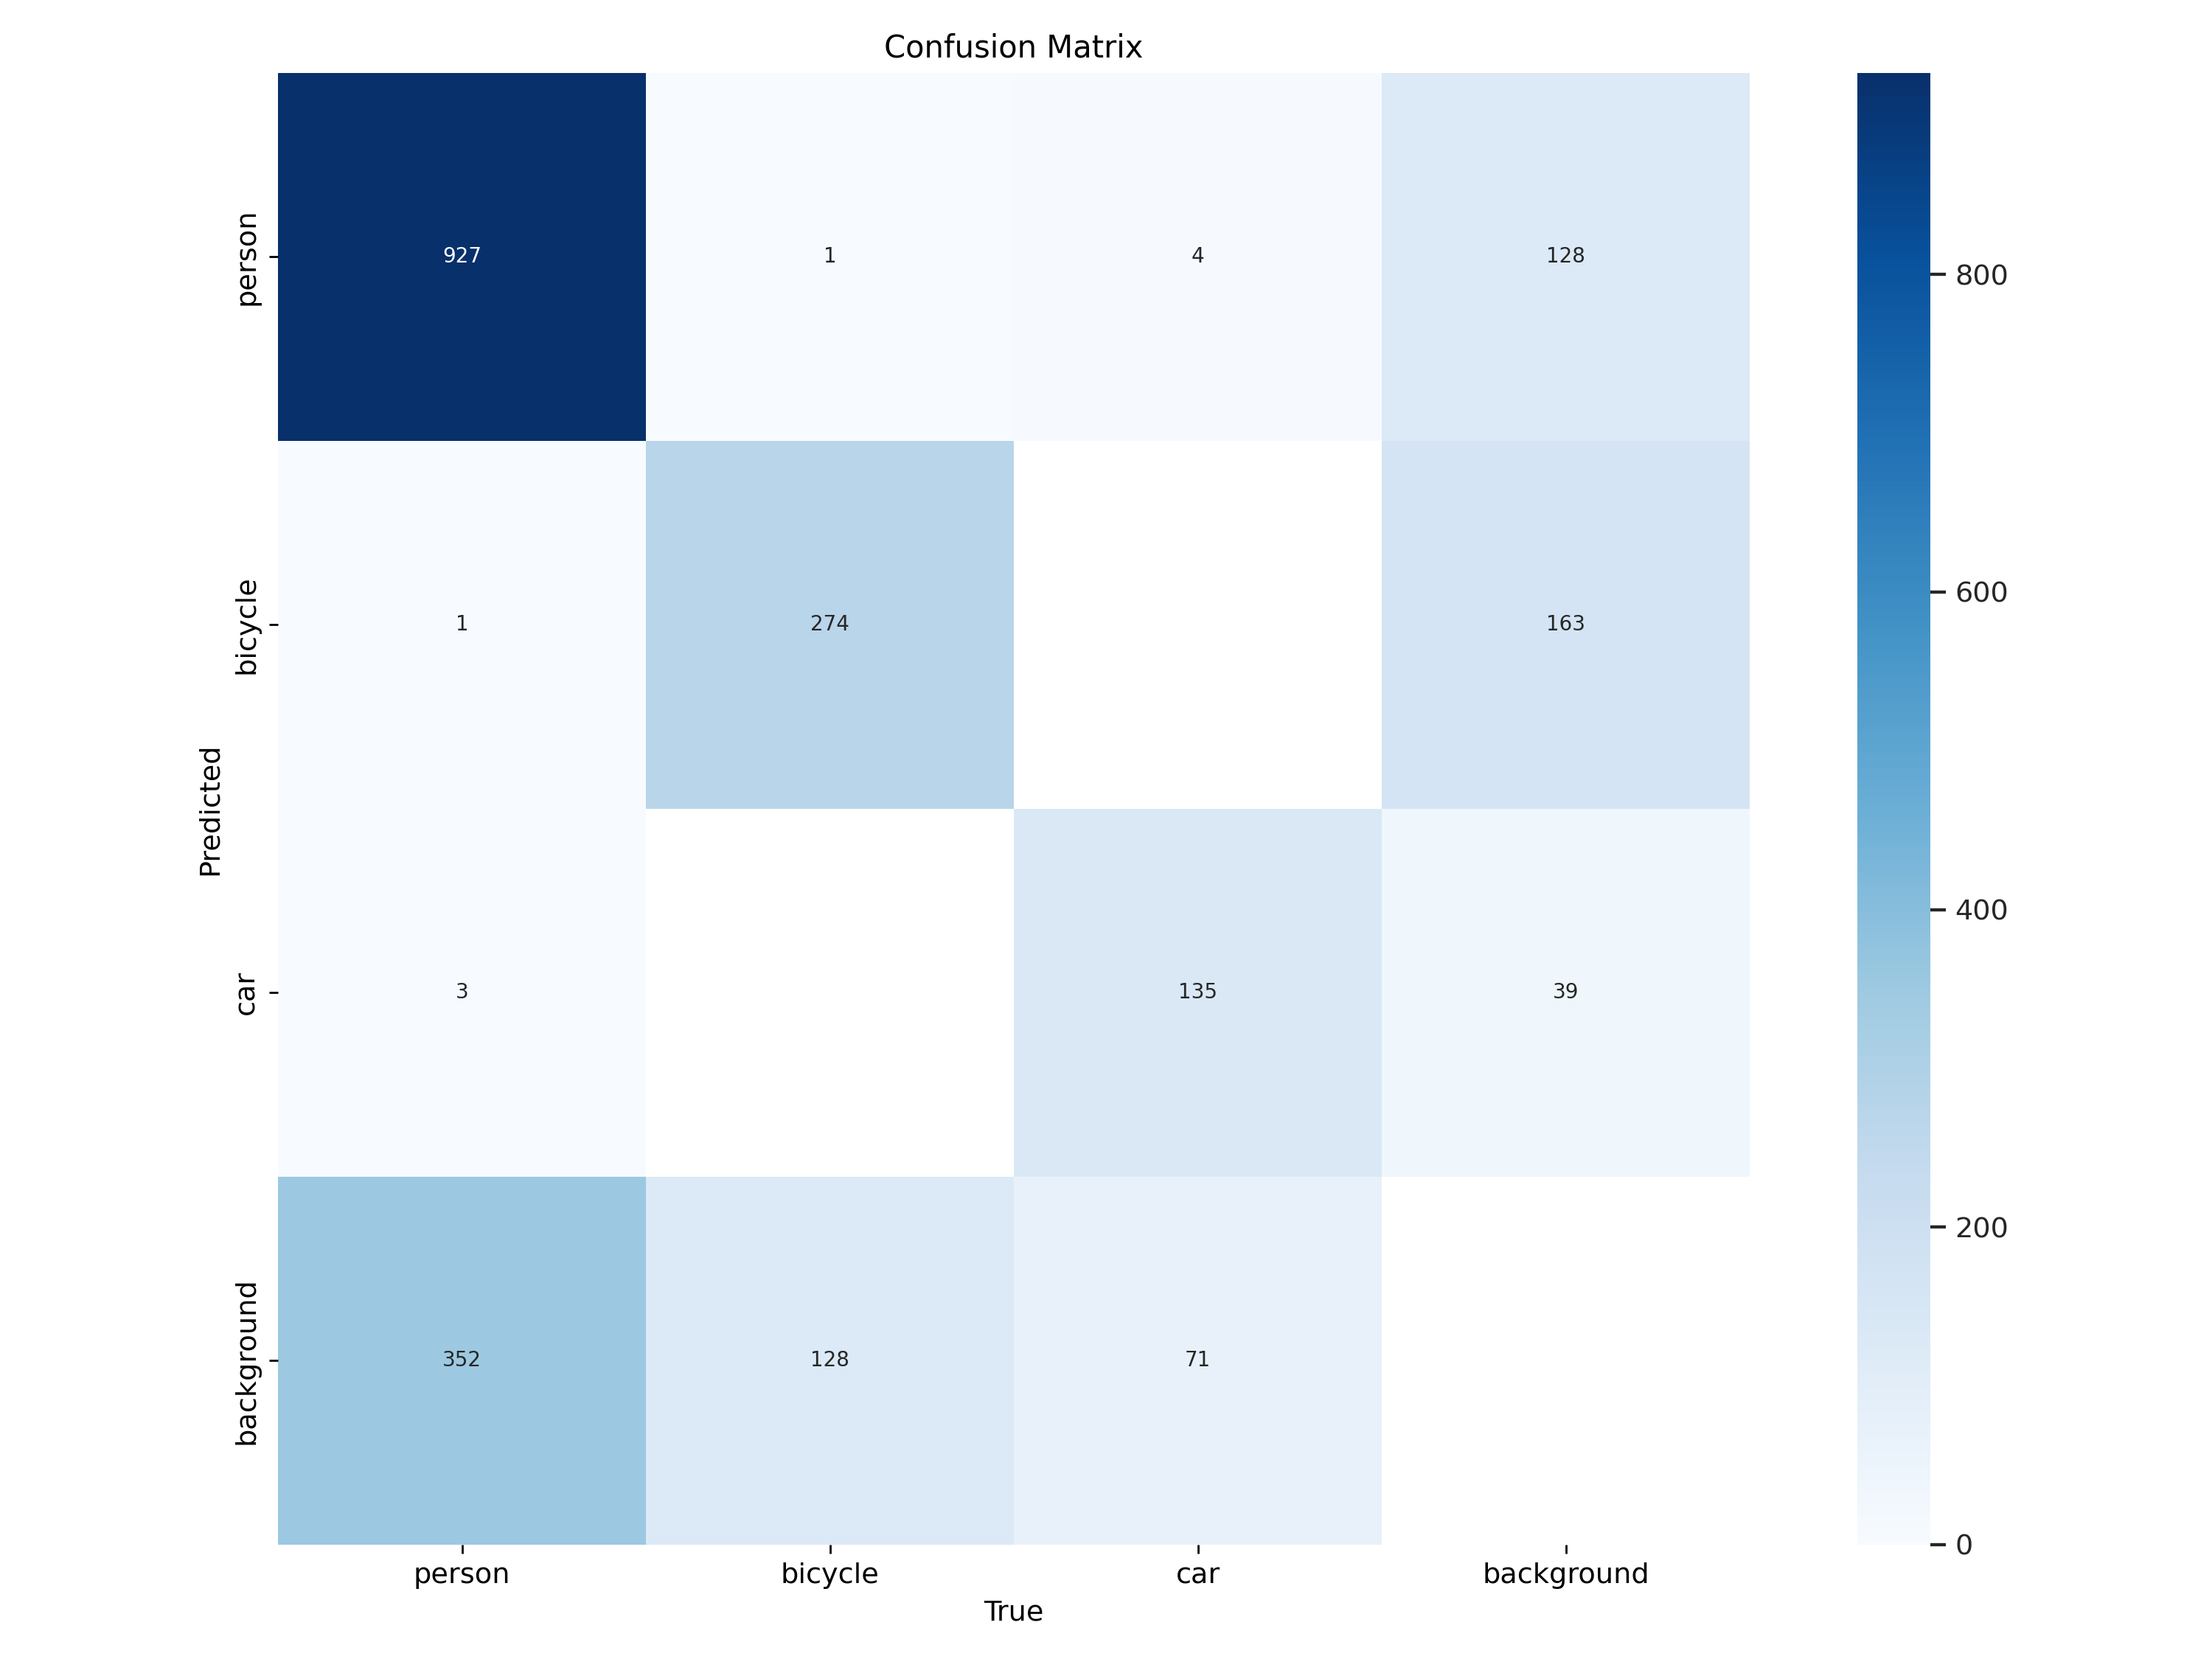

In [12]:
from IPython.display import Image

# Replace 'train' with 'train2' if that's where your output is, and adjust the filename if needed
Image(filename="/content/runs/detect/train/confusion_matrix.png", width=800)

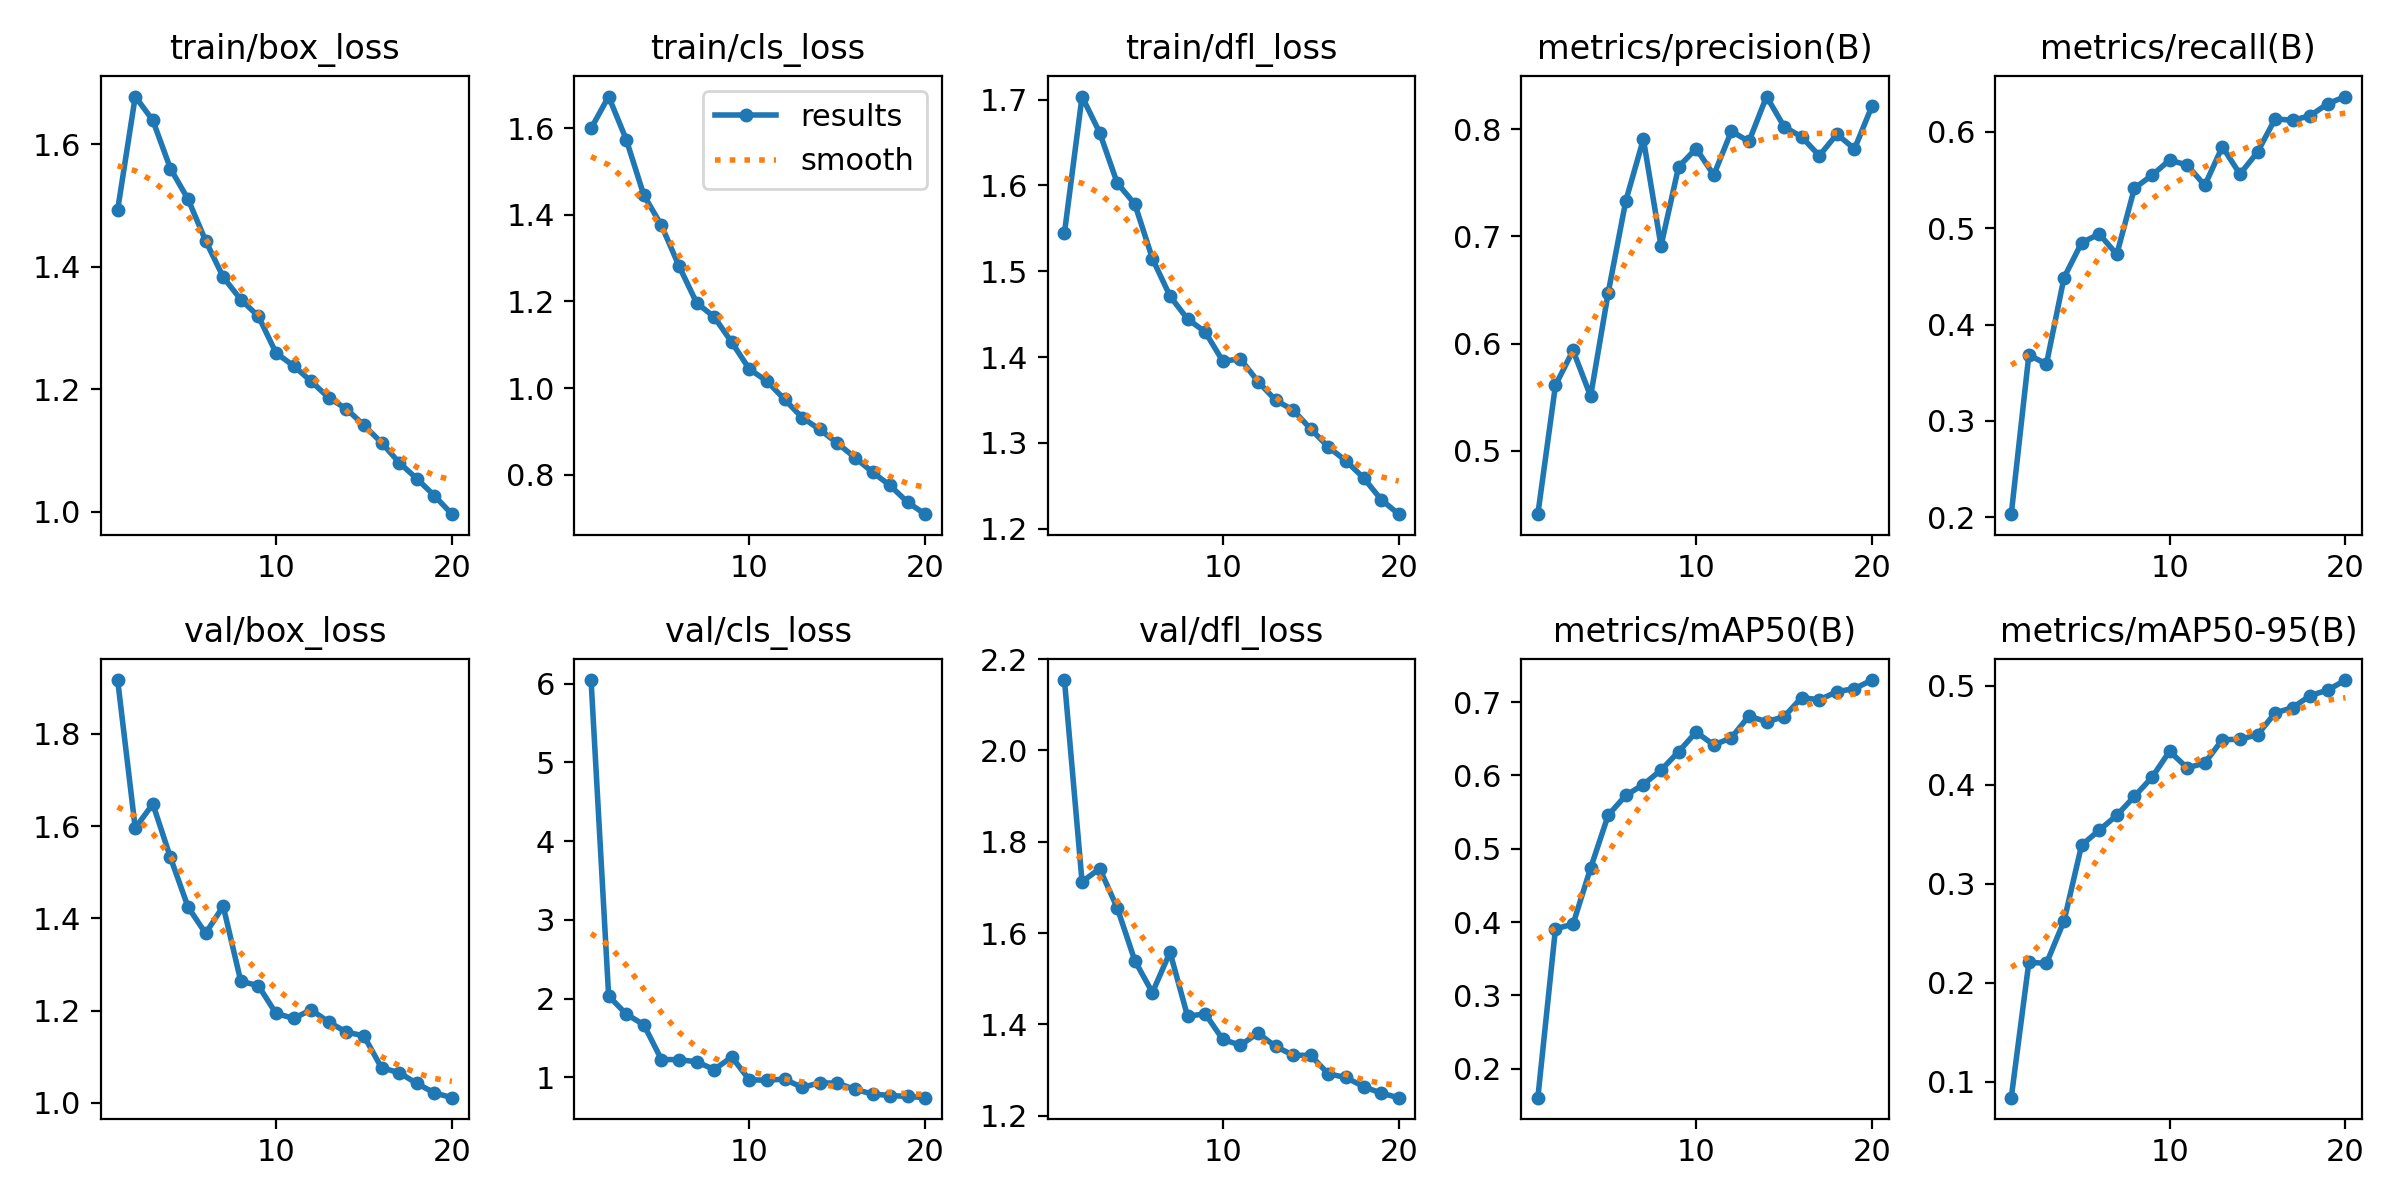

In [14]:
from IPython.display import Image

# Make sure that the filename is correct and the file exists at this path
Image(filename="/content/runs/detect/train/results.png", width=600)

In [15]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data='/content/drive/My Drive/sony/data.yaml'

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/drive/My Drive/sony/val/labels.cache... 321 images, 0 backgrounds, 0 corrupt: 100% 321/321 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:24<00:00,  1.17s/it]
                   all        321       1896       0.82      0.637       0.73      0.506
                person        321       1283      0.918      0.692      0.792      0.566
               bicycle        321        403       0.71      0.615      0.698      0.462
                   car        321        210      0.833      0.605        0.7       0.49
Speed: 1.7ms preprocess, 10.9ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [17]:
!ls /content/runs/detect/val

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg  val_batch2_pred.jpg


In [18]:
from google.colab import files

# Download confusion matrix
files.download('/content/runs/detect/val/confusion_matrix.png')

# Download PR curve
files.download('/content/runs/detect/val/PR_curve.png')

# Download a sample prediction image
files.download('/content/runs/detect/val/val_batch0_pred.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' conf=0.5 source='/content/drive/My Drive/sony/test/images'

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs

image 1/321 /content/drive/My Drive/sony/test/images/DSC01096.JPG: 704x1024 3 persons, 141.2ms
image 2/321 /content/drive/My Drive/sony/test/images/DSC01100.JPG: 704x1024 6 persons, 9 bicycles, 1 car, 16.2ms
image 3/321 /content/drive/My Drive/sony/test/images/DSC01101.JPG: 704x1024 5 persons, 8 bicycles, 1 car, 16.2ms
image 4/321 /content/drive/My Drive/sony/test/images/DSC01111.JPG: 704x1024 2 persons, 16.3ms
image 5/321 /content/drive/My Drive/sony/test/images/DSC01116.JPG: 704x1024 3 bicycles, 16.2ms
image 6/321 /content/drive/My Drive/sony/test/images/DSC01120.JPG: 704x1024 (no detections), 16.2ms
image 7/321 /content/drive/My Drive/sony/test/images/DSC01128.JPG: 704x1024 1 person, 16.3ms
image 8/321 /content/drive/My Drive/sony/test/images/DSC01140.JPG: 704x1024 4 cars, 16.3ms
image 9/321 /content/dri

#*download some predicted*

In [20]:
!ls /content/runs/detect/predict

DSC01096.JPG  DSC01452.JPG  DSC01937.JPG  DSC02449.JPG	DSC03041.JPG  DSC03486.JPG  DSC04046.JPG
DSC01100.JPG  DSC01455.JPG  DSC01939.JPG  DSC02455.JPG	DSC03044.JPG  DSC03498.JPG  DSC04061.JPG
DSC01101.JPG  DSC01473.JPG  DSC01948.JPG  DSC02471.JPG	DSC03055.JPG  DSC03508.JPG  DSC04113.JPG
DSC01111.JPG  DSC01521.JPG  DSC01959.JPG  DSC02476.JPG	DSC03091.JPG  DSC03533.JPG  DSC04118.JPG
DSC01116.JPG  DSC01532.JPG  DSC01967.JPG  DSC02483.JPG	DSC03092.JPG  DSC03534.JPG  DSC04126.JPG
DSC01120.JPG  DSC01544.JPG  DSC01968.JPG  DSC02499.JPG	DSC03107.JPG  DSC03536.JPG  DSC04140.JPG
DSC01128.JPG  DSC01550.JPG  DSC01981.JPG  DSC02517.JPG	DSC03117.JPG  DSC03545.JPG  DSC04153.JPG
DSC01140.JPG  DSC01556.JPG  DSC01982.JPG  DSC02526.JPG	DSC03122.JPG  DSC03546.JPG  DSC04154.JPG
DSC01150.JPG  DSC01586.JPG  DSC01988.JPG  DSC02528.JPG	DSC03128.JPG  DSC03549.JPG  DSC04155.JPG
DSC01154.JPG  DSC01591.JPG  DSC01993.JPG  DSC02532.JPG	DSC03129.JPG  DSC03562.JPG  DSC04167.JPG
DSC01166.JPG  DSC01592.JPG  DSC02006.JPG

In [21]:
import os
import shutil

# Define the source and destination directories
source_dir = '/content/runs/detect/predict'
dest_dir = '/content/selected_predictions'

# Create the destination directory if it doesn't exist
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Copy the first 20 images
files = sorted(os.listdir(source_dir))[:20]
for file in files:
    shutil.copy(os.path.join(source_dir, file), dest_dir)

# Compress the selected predictions
!zip -r /content/selected_predictions.zip /content/selected_predictions

  adding: content/selected_predictions/ (stored 0%)
  adding: content/selected_predictions/DSC01212.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01199.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01100.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01116.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01175.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01166.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01120.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01185.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01111.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01177.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01150.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01206.JPG (deflated 0%)
  adding: content/selected_predictions/DSC01172.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01169.JPG (deflated 1%)
  adding: content/select

In [ ]:
from google.colab import files
files.download('/content/selected_predictions.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>